# Ways to Visualize Top Count With Atoti

Given different categories of items, we will explore how to achieve the following with Atoti:

* Visualize top 10 apps with the highest rating in table.
* Visualize top 10 categories with most number of apps rated 5 in Pie chart.
* Visualize top 10 apps for each category in subplots.

See [pandas.ipynb](pandas.ipynb) to see how we can achieve the similar top count with Pandas.

💡 **Note:** We are using the [Google Play Store Apps data](https://www.kaggle.com/lava18/google-play-store-apps) from Kaggle. Data has been processed to convert strings with millions and thousands abbreviations into numeric data.

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Discover-Atoti-now.png" alt="Atoti table" /></a></div>

## Top count with Atoti

In [1]:
import atoti as tt

session = tt.Session.start(
    tt.SessionConfig(user_content_storage="./content", port=55708)
)

In [2]:
playstore = session.read_csv(
    "s3://data.atoti.io/notebooks/topcount/googleplaystore_cleaned.csv",
    table_name="playstore",
    keys=["App", "Category", "Genres", "Current Ver"],
    data_types={"Reviews": tt.type.FLOAT, "Installs": tt.type.FLOAT},
    process_quotes=True,
)

playstore.head()

,,,,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Last Updated,Android Ver
App,Category,Genres,Current Ver,,,,,,,,,
Weather forecast,WEATHER,Weather,1.11.93,4.8,159455.0,10000000.0,1000000.0,Free,0.0,Everyone,"May 8, 2018",4.4 and up
Equestria Amino for MLP,SOCIAL,Social,1.8.19106,4.8,8369.0,63000000.0,50000.0,Free,0.0,Teen,"July 13, 2018",4.0.3 and up
Kernel Manager for Franco Kernel ✨,TOOLS,Tools,3.2.5,4.8,12700.0,10000000.0,100000.0,Paid,3.49,Everyone,"August 3, 2018",5.0 and up
Note Everything,PRODUCTIVITY,Productivity,4.2.11,4.4,57033.0,<NA>,5000000.0,Free,0.0,Everyone,"October 18, 2016",Varies with device
Extreme- Personal Voice Assistant,PRODUCTIVITY,Productivity,132,4.4,25627.0,9800000.0,1000000.0,Free,0.0,Everyone,"August 5, 2018",5.0 and up


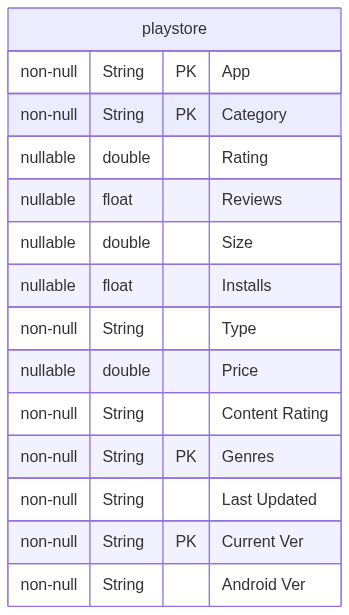

In [3]:
cube = session.create_cube(playstore, "Google Playstore")
session.tables.schema

### Top 10 apps with highest rating across categories

Use the content editor to apply a top count filter on the pivot table.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
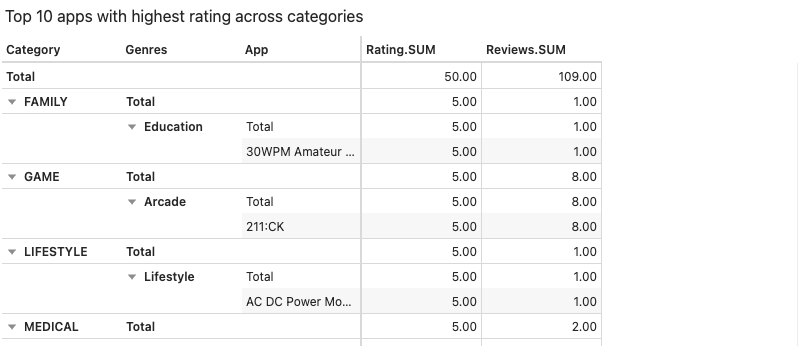

In [4]:
session.widget

### Top 10 categories with the most number of apps rated 5

In [5]:
h, l, m = cube.hierarchies, cube.levels, cube.measures
m

{'Installs.SUM': <atoti.measure.Measure object at 0x11c2c3dd0>, 'Price.SUM': <atoti.measure.Measure object at 0x11c2c3cd0>, 'Installs.MEAN': <atoti.measure.Measure object at 0x11c2c0ed0>, 'contributors.COUNT': <atoti.measure.Measure object at 0x11bc5d2d0>, 'Size.SUM': <atoti.measure.Measure object at 0x11bc5cb50>, 'Rating.MEAN': <atoti.measure.Measure object at 0x11bc5d250>, 'Reviews.MEAN': <atoti.measure.Measure object at 0x11bc5cdd0>, 'Rating.SUM': <atoti.measure.Measure object at 0x11bc5d310>, 'Price.MEAN': <atoti.measure.Measure object at 0x11bc5cf50>, 'Reviews.SUM': <atoti.measure.Measure object at 0x11bc5d010>, 'Size.MEAN': <atoti.measure.Measure object at 0x11bc5c790>, 'update.TIMESTAMP': <atoti.measure.Measure object at 0x11bc5c290>}

#### Number of apps rated 5

Create a measure that counts the number of apps rated 5 within categories and at levels below the category.

In [6]:
m["Count with rating 5"] = tt.agg.sum(
    tt.where(m["Rating.MEAN"] == 5, m["contributors.COUNT"], 0),
    scope=tt.OriginScope(levels={l["Category"], l["App"]}),
)

We can drill down to different levels from category and the count is computed on the fly.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
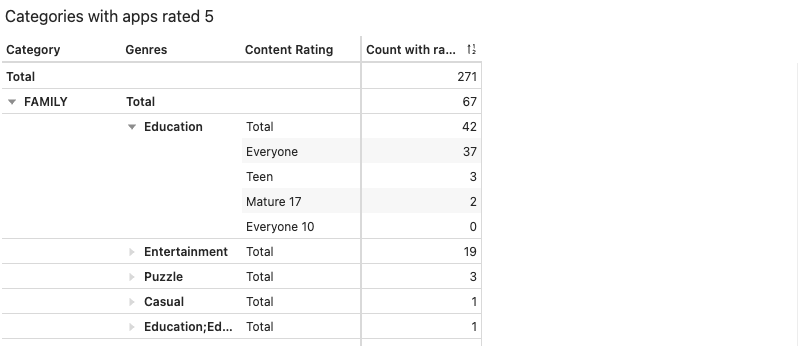

In [7]:
session.widget

Apply top count filter from **Atoti editor** on the category by the `Count with rating 5` measure. The Atoti editor is the Atoti's Jupyterlab extension on the right with the <img src="https://data.atoti.io/notebooks/topcount/Atoti-extension-logo.png" alt="a." width="25"> icon.

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
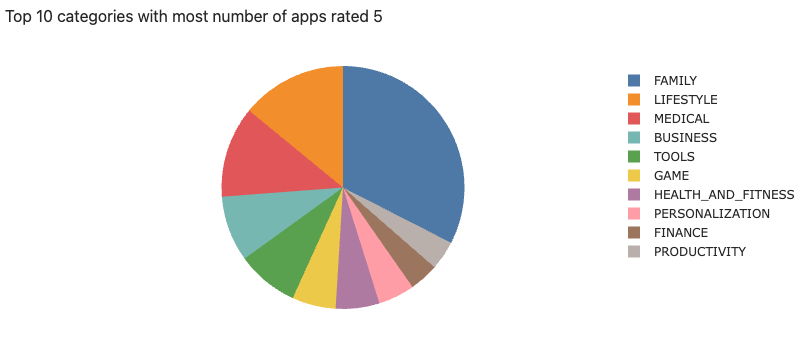

In [8]:
session.widget

### Top 10 apps for each category

Since we are performing top 10 apps filtering for each category, it's only right that we classify `App` under `Category`. In this case, we create a multi-level hierarchy such as the following:

In [9]:
h["App Categories"] = [l["Category"], l["App"]]
h

{('playstore', 'Android Ver'): <atoti.hierarchy.Hierarchy object at 0x11bb87650>, ('playstore', 'Category'): <atoti.hierarchy.Hierarchy object at 0x11b78e8d0>, ('playstore', 'Genres'): <atoti.hierarchy.Hierarchy object at 0x11b24eed0>, ('playstore', 'App'): <atoti.hierarchy.Hierarchy object at 0x11c2c97d0>, ('playstore', 'Type'): <atoti.hierarchy.Hierarchy object at 0x11bbb0950>, ('playstore', 'Content Rating'): <atoti.hierarchy.Hierarchy object at 0x11bfa9650>, ('playstore', 'Current Ver'): <atoti.hierarchy.Hierarchy object at 0x11c602790>, ('playstore', 'Last Updated'): <atoti.hierarchy.Hierarchy object at 0x11c603e10>, ('playstore', 'App Categories'): <atoti.hierarchy.Hierarchy object at 0x11c602950>}

This structure allows us to select at which level we want to apply the top count on in a multilevel hierarchy from the Atoti editor.  
<img src="https://data.atoti.io/notebooks/topcount/filter_by_category.png" alt="Filter by level" width="30%">

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
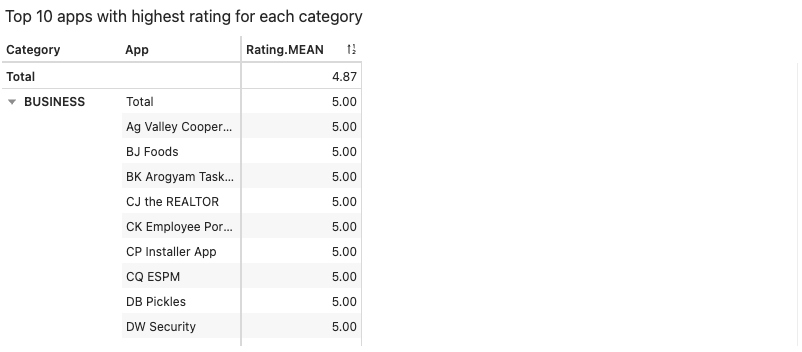

In [10]:
session.widget

#### Creating subplot to visualize top count per category

Again, go to the Atoti's Jupyterlab extension and add `Category` level to the subplot section.  
<img src="https://data.atoti.io/notebooks/topcount/atoti_subplot_controls.png" alt="create subplot" width="30%">

Slice the pie chart is by `Apps` and apply filter on `App` level of the `App Categories`

Open the notebook in JupyterLab with the Atoti JupyterLab extension enabled to build this widget.
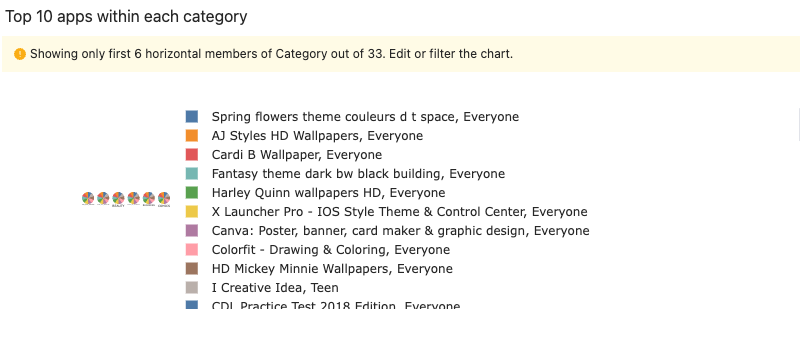

In [11]:
session.widget

You can use the filter to select the categories that you want to view. Alternative, use `session.link` to access the web application to build an interactive dashboard with quick filters. Check out the link below.

In [12]:
session.link / "#/dashboard/767"

http://localhost:55708/#/dashboard/767

<div style="text-align:center"><a href="https://www.atoti.io/?utm_source=gallery&utm_content=top-count-atoti" target="_blank" rel="noopener noreferrer"><img src="https://data.atoti.io/notebooks/banners/Your-turn-to-try-Atoti.jpg" alt="Atoti table" /></a></div>